# Entrenament #

Dividir el conjunt de dades, codificar variables categòriques, estandarditzar les característiques i reduir la dimensionalitat del conjunt de dades. Recorda quin conjunt de dades has d'utilitzar a cada moment.

In [1]:
cd C:/Users/thais/Documents/00_MACHINE_LEARNING/


C:\Users\thais\Documents\00_MACHINE_LEARNING


In [26]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import sys  # Añade esta línea para importar sys
from sklearn.preprocessing import RobustScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import warnings

# Suprimir todas las advertencias
warnings.filterwarnings('ignore')

from scipy import stats

In [27]:
banc_def= pd.read_csv ('banc_def.csv') # carreguem el dataset

In [28]:
banc_def.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   deposit                11162 non-null  object
 1   age                    11162 non-null  int64 
 2   balance                11162 non-null  int64 
 3   duration               11162 non-null  int64 
 4   campaign               11162 non-null  int64 
 5   pdays                  11162 non-null  int64 
 6   job                    11162 non-null  object
 7   marital                11162 non-null  object
 8   education              11162 non-null  object
 9   day                    11162 non-null  int64 
 10  month                  11162 non-null  object
 11  default_numeric        11162 non-null  int64 
 12  housing_numeric        11162 non-null  int64 
 13  loan_numeric           11162 non-null  int64 
 14  contact_previ_numeric  11162 non-null  int64 
dtypes: int64(10), objec

In [29]:
# Llistat de columnes que vols eliminar
columnes_a_eliminar = [
    'job', 'campaign', 'day','month',
]

# Eliminar les columnes no desitjades
banc_def = banc_def.drop(columns=columnes_a_eliminar)

# Mostrar les columnes restants
print("Columnes restants després d'eliminar les no desitjades:")
print(banc_def.columns.tolist())

Columnes restants després d'eliminar les no desitjades:
['deposit', 'age', 'balance', 'duration', 'pdays', 'marital', 'education', 'default_numeric', 'housing_numeric', 'loan_numeric', 'contact_previ_numeric']


In [30]:
banc_def.describe()

,age,balance,duration,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.235173,1528.538524,371.993818,52.076151,0.015051,0.473123,0.130801,0.254256
std,11.909598,3225.413326,347.128386,108.399706,0.121761,0.499299,0.337198,0.435461
min,18.000000,-6847.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,138.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,550.000000,255.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,49.000000,1708.000000,496.000000,20.750000,0.000000,1.000000,0.000000,1.000000
max,95.000000,81204.000000,3881.000000,854.000000,1.000000,1.000000,1.000000,1.000000


In [31]:
banc_transformed=banc_def.copy()

In [32]:
target = 'deposit'

# Separació de les variables numèriques i categòriques
num_vars = banc_transformed.select_dtypes(include=['int64', 'float64']).columns
cat_vars = banc_transformed.select_dtypes(include=['object']).columns.drop(target)

# Aplicació de RobustScaler a les variables numèriques
scaler = RobustScaler()
# Transformem les variables numèriques i les convertim a DataFrame abans d'assignar-les
banc_transformed[num_vars] = pd.DataFrame(scaler.fit_transform(banc_transformed[num_vars]), columns=num_vars)

# Aplicació de get_dummies a les variables categòriques
banc_transformed = pd.get_dummies(banc_transformed, columns=cat_vars, drop_first=True)

# Codificación de la variable objetivo
label_encoder = LabelEncoder()
banc_transformed['deposit'] = label_encoder.fit_transform(banc_transformed['deposit'])  # Convertir 'deposit' a valores numéricos

banc_transformed.head()

,deposit,age,balance,duration,pdays,default_numeric,housing_numeric,loan_numeric,contact_previ_numeric,marital_married,marital_single,education_secondary,education_tertiary,education_unknown
0,1,1.176471,1.130517,2.198324,0.0,0.0,1.0,0.0,0.0,True,False,True,False,False
1,1,1.000000,-0.318411,3.385475,0.0,0.0,0.0,0.0,0.0,True,False,True,False,False
2,1,0.117647,0.453972,3.167598,0.0,0.0,1.0,0.0,0.0,True,False,True,False,False
3,1,0.941176,1.214376,0.905028,0.0,0.0,1.0,0.0,0.0,True,False,True,False,False
4,1,0.882353,-0.230769,1.167598,0.0,0.0,0.0,0.0,0.0,True,False,False,True,False


Best params for logistic: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best params for decision_tree: {'classifier__max_depth': 10}
Best params for random_forest: {'classifier__max_depth': 10, 'classifier__n_estimators': 100}
Best params for gradient_boosting: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
Best params for xgboost: {'classifier__learning_rate': 0.1, 'classifier__n_estimators': 100}
--- logistic ---
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.84      0.81      1762
           1       0.80      0.74      0.77      1587

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

Confusion Matrix:
 [[1472  290]
 [ 418 1169]]




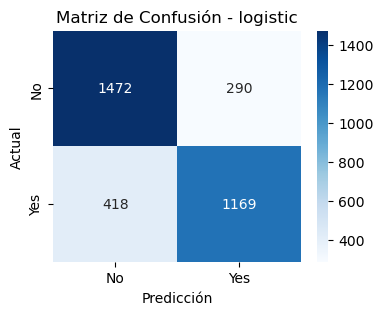

--- decision_tree ---
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80      1762
           1       0.78      0.77      0.77      1587

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349

Confusion Matrix:
 [[1414  348]
 [ 366 1221]]




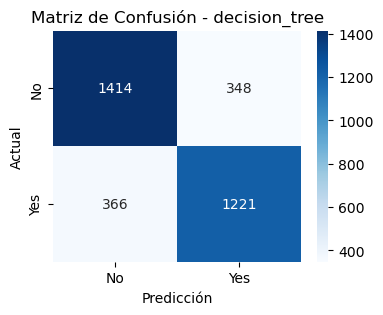

--- random_forest ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.80      0.82      1762
           1       0.79      0.82      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1412  350]
 [ 289 1298]]




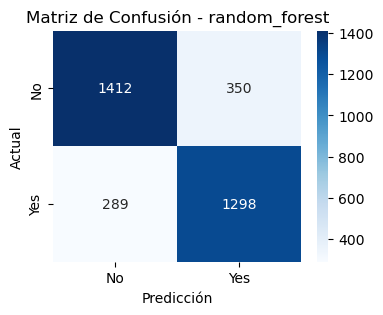

--- gradient_boosting ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.82      0.82      1762
           1       0.80      0.81      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1445  317]
 [ 306 1281]]




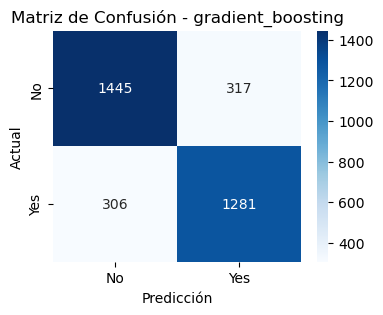

--- xgboost ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1762
           1       0.79      0.81      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1425  337]
 [ 297 1290]]




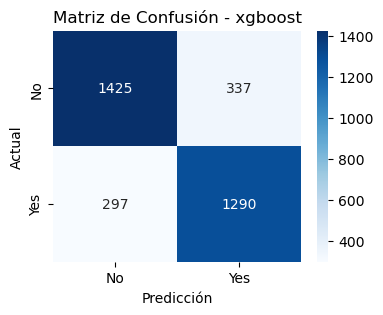

Modelo de Random Forest guardado exitosamente.


In [33]:
target = 'deposit'
X = banc_transformed.drop(columns=[target])  # Características
y = banc_transformed[target]  # Variable objetivo

# Separar en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Definir modelos y pipelines
models = {
    'logistic': LogisticRegression(random_state=42, max_iter=1000),
    'decision_tree': DecisionTreeClassifier(),
    'random_forest': RandomForestClassifier(),
    'gradient_boosting': GradientBoostingClassifier(),
    'xgboost': XGBClassifier(eval_metric='logloss', use_label_encoder=False)
}

# Crear pipelines que incluyan el escalador y el clasificador
pipelines = {name: Pipeline([
    ('scaler', RobustScaler()),  # Aplicamos el escalador en el pipeline
    ('classifier', model)
]) for name, model in models.items()}

# Ajustar las características de entrenamiento en el escalador antes de Grid Search
best_estimators = {}
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)  # Ajustamos el pipeline
    best_estimators[name] = pipeline  # Guardamos el pipeline ajustado

# Parámetros de Grid Search ajustados
param_grids = {
    'logistic': {
        'classifier__C': [0.01, 0.1, 1, 10],
        'classifier__penalty': ['l1', 'l2'],
        'classifier__solver': ['liblinear']
    },
    'decision_tree': {
        'classifier__max_depth': [10, 20]
    },
    'random_forest': {
        'classifier__n_estimators': [100],
        'classifier__max_depth': [10, 20]
    },
    'gradient_boosting': {
        'classifier__n_estimators': [100],
        'classifier__learning_rate': [0.01, 0.1]
    },
    'xgboost': {
        'classifier__n_estimators': [100],
        'classifier__learning_rate': [0.01, 0.1]
    }
}

# Grid Search y mejor modelo
for name, pipeline in pipelines.items():
    if name in param_grids:
        grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
        grid_search.fit(X_train, y_train)
        best_estimators[name] = grid_search.best_estimator_
        print(f'Best params for {name}: {grid_search.best_params_}')
    else:
        best_estimators[name] = pipeline

# Evaluación y visualización
for name, model in best_estimators.items():
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f'--- {name} ---')
    print(f'Accuracy: {score:.2f}')
    print("Classification Report:\n", report)
    print("Confusion Matrix:\n", conf_matrix)
    print("\n")

    # Visualización condicional de la matriz de confusión
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
    plt.ylabel('Actual')
    plt.xlabel('Predicción')
    plt.title(f'Matriz de Confusión - {name}')
    plt.show()

# Guardar el mejor modelo de Random Forest
best_random_forest_model = best_estimators['random_forest']
with open('random_forest_model.pkl', 'wb') as model_file:
    pickle.dump(best_random_forest_model, model_file)
print("Modelo de Random Forest guardado exitosamente.")


## Visualización de Curvas con el Modelo Entrenado ##

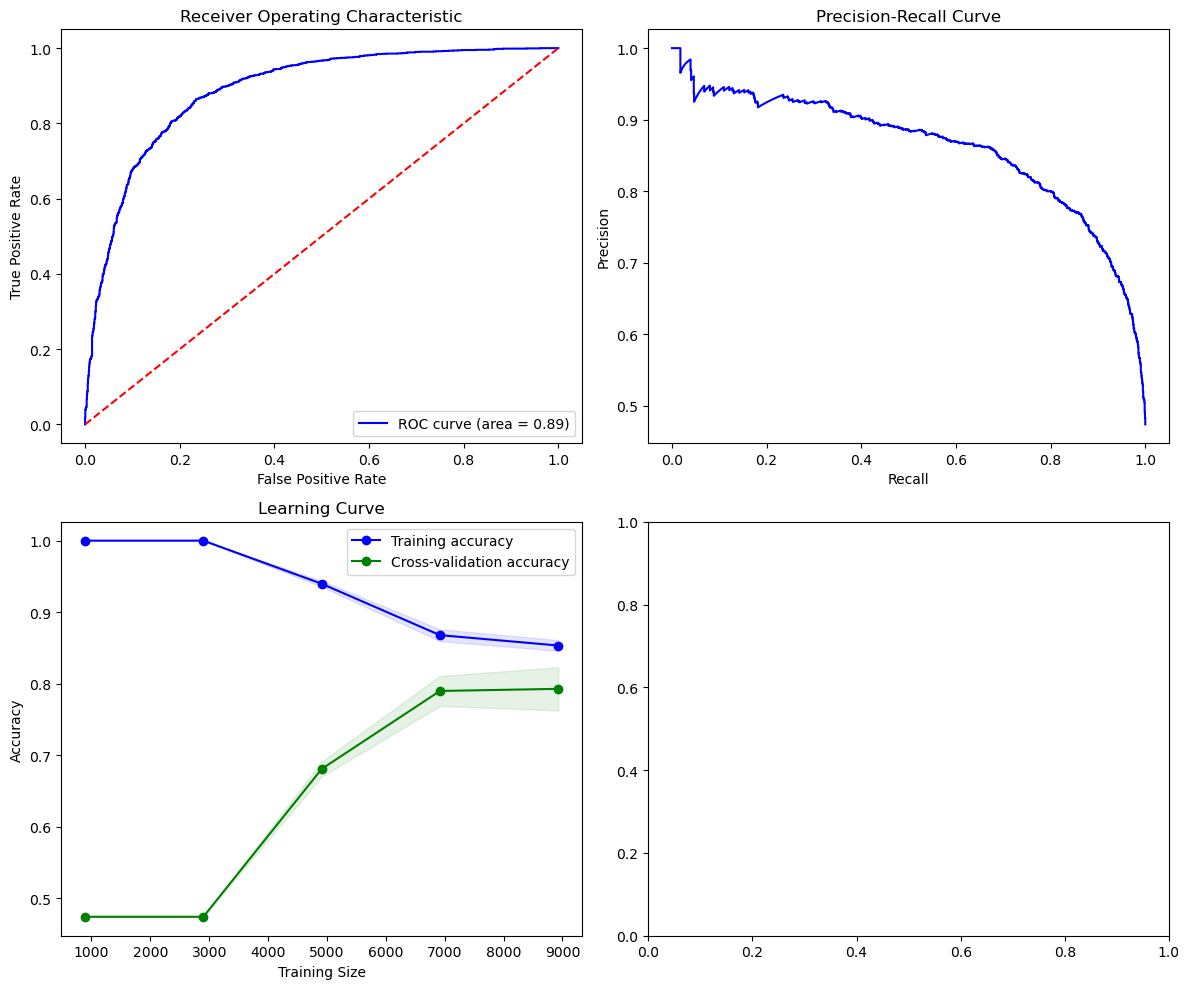

In [36]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import learning_curve

# Obtener el mejor modelo
rf_model = best_estimators['random_forest']

# Predecir probabilidades en el conjunto de prueba
y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilidades de la clase positiva

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Calcular la curva de precisión-recall
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Generar las curvas de aprendizaje
train_sizes, train_scores, test_scores = learning_curve(rf_model, X, y, cv=5, n_jobs=-1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Crear la figura con subtramas
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Curva ROC
axs[0, 0].plot(fpr, tpr, color='blue', label='ROC curve (area = %0.2f)' % roc_auc)
axs[0, 0].plot([0, 1], [0, 1], color='red', linestyle='--')
axs[0, 0].set_xlabel('False Positive Rate')
axs[0, 0].set_ylabel('True Positive Rate')
axs[0, 0].set_title('Receiver Operating Characteristic')
axs[0, 0].legend(loc='lower right')

# Curva de Precisión-Recall
axs[0, 1].plot(recall, precision, color='blue')
axs[0, 1].set_xlabel('Recall')
axs[0, 1].set_ylabel('Precision')
axs[0, 1].set_title('Precision-Recall Curve')

# Curvas de Aprendizaje
axs[1, 0].plot(train_sizes, train_mean, color='blue', marker='o', label='Training accuracy')
axs[1, 0].plot(train_sizes, test_mean, color='green', marker='o', label='Cross-validation accuracy')
axs[1, 0].fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.1)
axs[1, 0].fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.1)
axs[1, 0].set_title('Learning Curve')
axs[1, 0].set_xlabel('Training Size')
axs[1, 0].set_ylabel('Accuracy')
axs[1, 0].legend()

# Ajustar el diseño para evitar superposiciones
plt.tight_layout()
plt.show()


--- random_forest ---
Accuracy: 0.81
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      1762
           1       0.79      0.81      0.80      1587

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349

Confusion Matrix:
 [[1422  340]
 [ 296 1291]]


In [37]:
# Crear requirements.txt en la carpeta actual
!pip freeze > requirements.txt


In [38]:
# Leer el contenido de requirements.txt y mostrarlo
with open('requirements.txt', 'r') as f:
    content = f.read()
    print(content)


altair @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/altair_1699497320503/work
anyio @ file:///C:/b/abs_847uobe7ea/croot/anyio_1706220224037/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/argon2-cffi-bindings_1699549801117/work
arrow==1.3.0
asttokens @ file:///opt/conda/conda-bld/asttokens_1646925590279/work
async-lru @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/async-lru_1701796859357/work
attrs @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/attrs_1699473735254/work
Babel @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/babel_1699475785740/work
beautifulsoup4 @ file:///C:/b/abs_d5wytg_p0w/croot/beautifulsoup4-split_1718029833749/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
blinker @ file:///C:/Users/dev-admin/perseverance-python-buildout/croot/blinker_1699474692786/work
Bottleneck

In [39]:
# Limpiar el archivo requirements.txt para que solo contenga nombre de biblioteca y versión
with open('requirements.txt', 'r') as f:
    lines = f.readlines()

# Crear una lista para almacenar las líneas limpias
cleaned_lines = []

for line in lines:
    if "@" in line:
        # Extraer el nombre y la versión
        name_version = line.split('@')[0].strip()
        cleaned_lines.append(name_version)
    else:
        # Solo agregar la línea si ya está en el formato correcto
        cleaned_lines.append(line.strip())

# Guardar las líneas limpias en el archivo requirements.txt
with open('requirements.txt', 'w') as f:
    for line in cleaned_lines:
        if line:  # Asegúrate de que no se agreguen líneas vacías
            f.write(line + '\n')
